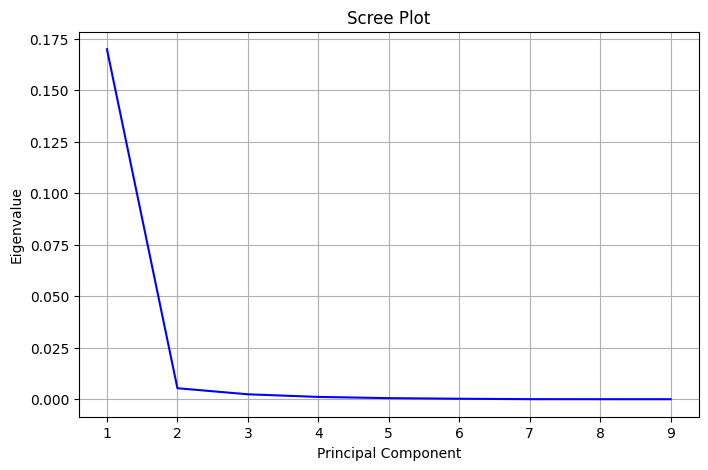

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
df = pd.read_csv("Battery_RUL.csv")
scaler = MinMaxScaler()
columns_to_scale = df.columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
pca = PCA(n_components=len(df.columns))
pca_features=pca.fit_transform(df)
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

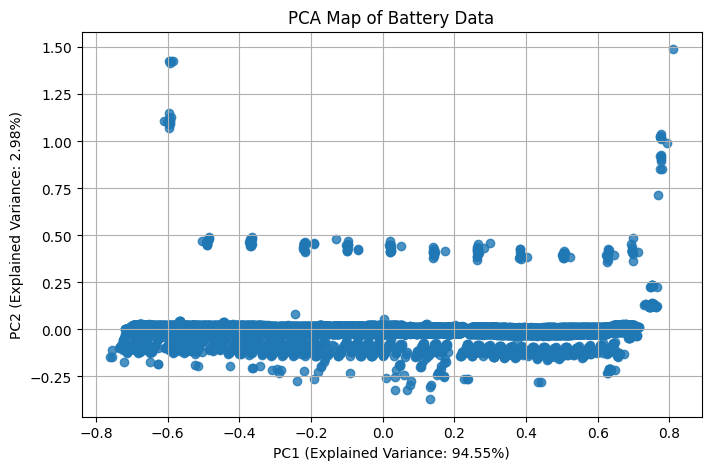

In [2]:
plt.figure(figsize=(8, 5))
plt.scatter(pca_features[:, 0], pca_features[:, 1], alpha=0.8)  # Adjust alpha for better visualization
plt.xlabel('PC1 (Explained Variance: {:.2f}%)'.format(pca.explained_variance_ratio_[0] * 100))
plt.ylabel('PC2 (Explained Variance: {:.2f}%)'.format(pca.explained_variance_ratio_[1] * 100))
plt.title('PCA Map of Battery Data')
plt.grid(True)
plt.show()

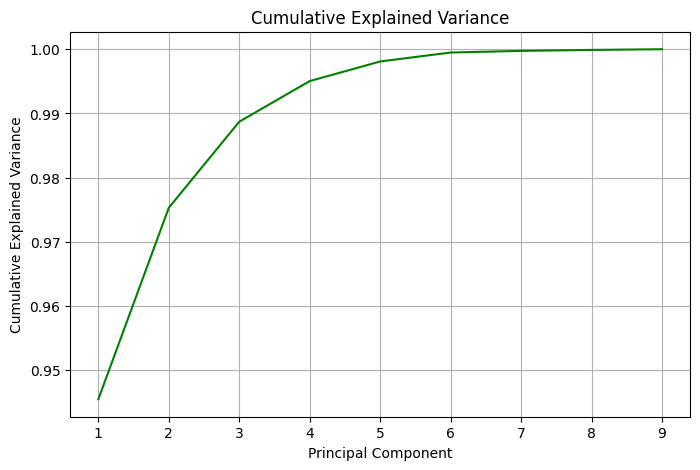

Explained Variance for PC 1: 0.9455
Explained Variance for PC 2: 0.0298
Explained Variance for PC 3: 0.0134
Explained Variance for PC 4: 0.0063
Explained Variance for PC 5: 0.0031
Explained Variance for PC 6: 0.0014
Explained Variance for PC 7: 0.0003
Explained Variance for PC 8: 0.0001
Explained Variance for PC 9: 0.0001


In [3]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, color='green')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Print explained variance per component
for i, ev in enumerate(explained_variance_ratio):
    print(f"Explained Variance for PC {i+1}: {ev:.4f}")

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from keras.metrics import RootMeanSquaredError
from sklearn.decomposition import PCA
df = pd.read_csv("Battery_RUL.csv")
scaler = MinMaxScaler()
columns_to_scale = df.columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
selector = SelectKBest(mutual_info_regression, k=5)
selected_features = selector.fit(df[columns_to_scale], df['RUL']).get_support()
selected_indices = np.array(selected_features)
new_df = df[columns_to_scale[selected_indices]]

In [5]:
pca = PCA(n_components=3)
pca_features = pca.fit_transform(new_df)

FOR 4 COMPONENTS: RMSE=0.014
FOR 3 COMPONENTS: RMSE=0.0083
FOR 2 COMPONENTS: RMSE = 0.0147



In [11]:

sequence_length = 100
sequences = []
labels = []
for i in range(len(pca_features) - sequence_length):
    seq = pca_features[i:i + sequence_length]
    label = new_df.iloc[i+sequence_length]['RUL']
    sequences.append(seq)
    labels.append(label)

X = np.array(sequences)
y = np.array(labels)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for CNN-LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 3))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 3))

# Build the CNN-LSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, 3)))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=1, activation='linear'))

# Compile with Adam optimizer and RMSE metric
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[RootMeanSquaredError()])

# Train the model with 25 epochs
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1)


Epoch 1/25
337/337 [==============================] - 21s 54ms/step - loss: 0.0099 - root_mean_squared_error: 0.0996 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0358
Epoch 2/25
337/337 [==============================] - 18s 52ms/step - loss: 7.4430e-04 - root_mean_squared_error: 0.0273 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0324
Epoch 3/25
337/337 [==============================] - 18s 53ms/step - loss: 5.8746e-04 - root_mean_squared_error: 0.0242 - val_loss: 8.2439e-04 - val_root_mean_squared_error: 0.0287
Epoch 4/25
337/337 [==============================] - 18s 53ms/step - loss: 4.6718e-04 - root_mean_squared_error: 0.0216 - val_loss: 6.9591e-04 - val_root_mean_squared_error: 0.0264
Epoch 5/25
337/337 [==============================] - 18s 53ms/step - loss: 4.8431e-04 - root_mean_squared_error: 0.0220 - val_loss: 4.7577e-04 - val_root_mean_squared_error: 0.0218
Epoch 6/25
337/337 [==============================] - 18s 53ms/step - loss: 3.9780e-04 - root_mean_squ

94/94 [==============================] - 2s 19ms/step - loss: 6.9123e-05 - root_mean_squared_error: 0.0083
Test Loss: [6.912310345796868e-05, 0.00831403024494648]
94/94 [==============================] - 2s 18ms/step
[[0.5831384 ]
 [0.8302827 ]
 [0.58625966]
 [0.45609796]
 [0.76160735]]
[0.58252427 0.83230362 0.58517211 0.46425419 0.76345984]


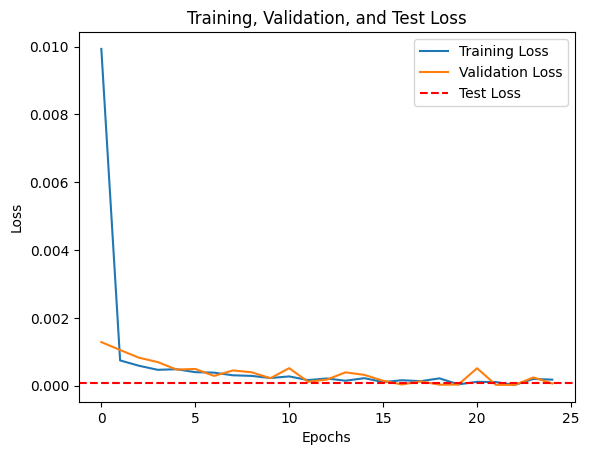

In [12]:
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

predictions = model.predict(X_test)
print(predictions[:5])
print(y_test[:5])
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=loss[0], color='r', linestyle='--', label='Test Loss')  # Add a line for test loss
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
